In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("DoctorVisits - DA.csv")

In [4]:
df


,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no


In [5]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()


Unnamed: 0    0
visits        0
gender        0
age           0
income        0
illness       0
reduced       0
health        0
private       0
freepoor      0
freerepat     0
nchronic      0
lchronic      0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

In [9]:
summary_stats = df[['illness', 'nchronic', 'lchronic']].describe()
print(summary_stats)



           illness
count  5190.000000
mean      1.431985
std       1.384152
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       5.000000


In [25]:
correlation_matrix = df[['illness', 'nchronic', 'lchronic']].corr(numeric_only=True)
print(correlation_matrix)


           illness  nchronic  lchronic
illness   1.000000  0.245299  0.220663
nchronic  0.245299  1.000000 -0.298503
lchronic  0.220663 -0.298503  1.000000


In [24]:
gender_analysis = df.groupby('gender')[['illness', 'nchronic', 'lchronic']].mean()
print(gender_analysis)


         illness  nchronic  lchronic
gender                              
female  1.611029  0.475574  0.125833
male    1.237540  0.324357  0.106511


In [23]:
income_analysis = df.groupby(pd.cut(df['income'], bins=5))[['illness', 'nchronic', 'lchronic']].mean()
print(income_analysis)

                 illness  nchronic  lchronic
income                                      
(-0.0015, 0.3]  1.743590  0.482906  0.163614
(0.3, 0.6]      1.468774  0.387509  0.103837
(0.6, 0.9]      1.229911  0.342634  0.083705
(0.9, 1.2]      1.140000  0.350526  0.085263
(1.2, 1.5]      1.164456  0.387268  0.114058


In [13]:
df.replace('no', 0, inplace=True)
df.replace('yes', 1, inplace=True)

df.dropna(inplace=True)

df[['nchronic', 'lchronic']] = df[['nchronic', 'lchronic']].astype(float)


0       0
1       0
2       0
3       0
4       1
       ..
5185    0
5186    0
5187    0
5188    0
5189    0
Name: cluster, Length: 5190, dtype: int32


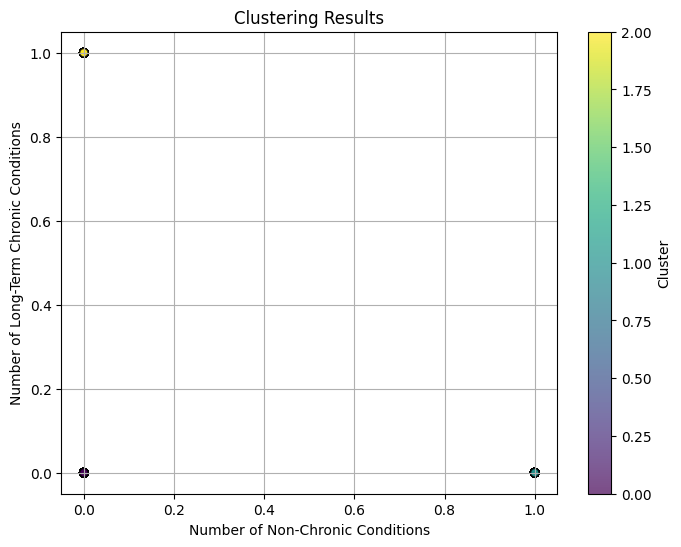

In [14]:
from sklearn.cluster import KMeans

X = df[['nchronic', 'lchronic']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)
print(df['cluster'])

# Scatter plot of clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df['nchronic'], df['lchronic'], c=df['cluster'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Clustering Results')
plt.xlabel('Number of Non-Chronic Conditions')
plt.ylabel('Number of Long-Term Chronic Conditions')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Correlation Analysis :

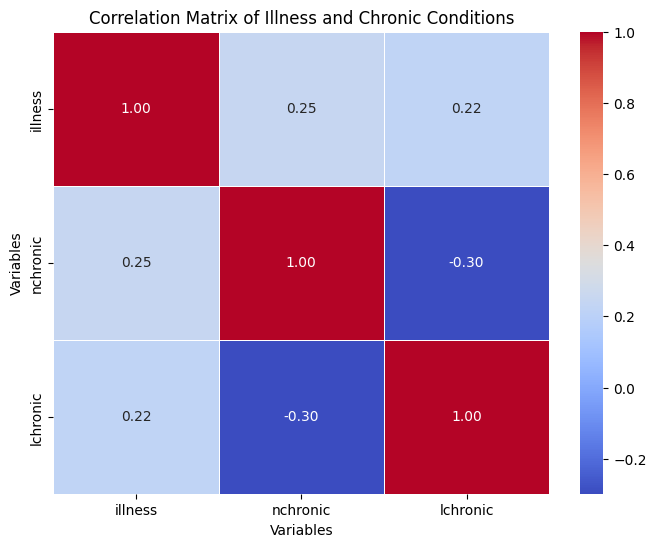

In [15]:
correlation_matrix = df[['illness', 'nchronic', 'lchronic']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Illness and Chronic Conditions')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [17]:
df['actual age'] = df['age']*100
df['actual age'].astype(int)

0       19
1       19
2       19
3       19
4       19
        ..
5185    22
5186    27
5187    37
5188    52
5189    72
Name: actual age, Length: 5190, dtype: int64

Patient Segmentation:

age_group
<18           NaN
18-35    0.219433
36-50    0.275938
51-65    0.385943
65+      0.453826
Name: visits, dtype: float64
      Unnamed: 0  visits  gender   age  income  illness  reduced  health  \
2              3       1    male  0.19    0.90        3        0       0   
5              6       1  female  0.19    0.35        5        1       9   
6              7       1  female  0.19    0.55        4        0       2   
7              8       1  female  0.19    0.15        3        0       6   
12            13       2    male  0.19    0.55        3       13       1   
...          ...     ...     ...   ...     ...      ...      ...     ...   
5130        5131       0    male  0.72    0.75        5        0       5   
5132        5133       0    male  0.72    0.45        3        0       0   
5135        5136       0  female  0.72    0.25        3        0       0   
5152        5153       0  female  0.72    0.25        4        0       0   
5155        5156       0  female  0

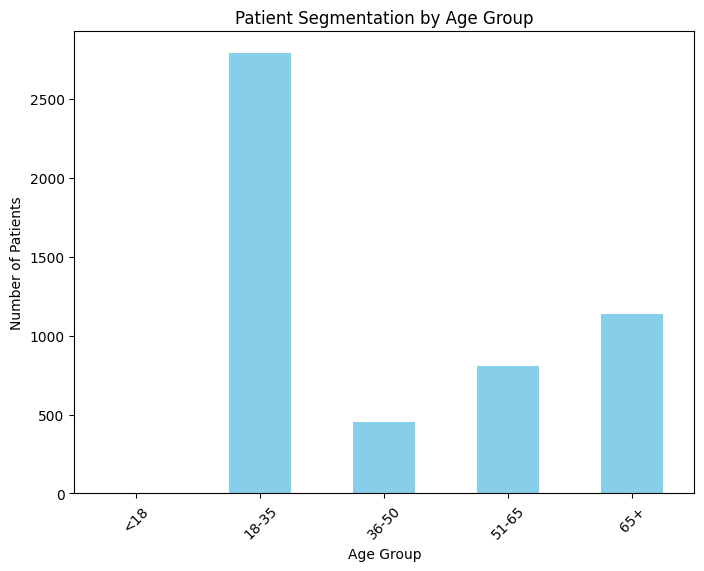

In [18]:
# Segment patients based on demographic characteristics

df['age_group'] = pd.cut(df['actual age'], bins=[0, 18, 35, 50, 65, np.inf], labels=['<18', '18-35', '36-50', '51-65', '65+'])

# Analyze visit patterns within each segment
visit_patterns = df.groupby('age_group')['visits'].mean()
print(visit_patterns)

threshold_value = 2
# Identify high-risk patient groups
high_risk_patients = df[df['illness'] > threshold_value]  # Define threshold value for high illness severity
print(high_risk_patients)


age_group_counts = df['age_group'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Patient Segmentation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()


Impact of Socioeconomic Factors:

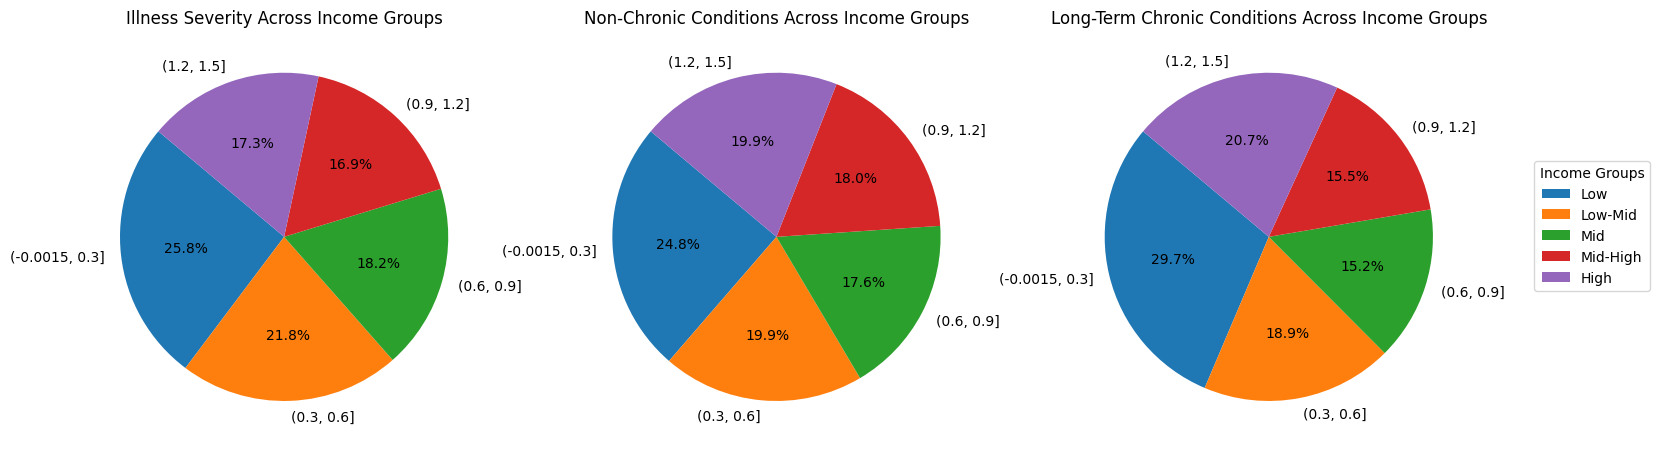

In [20]:
income_analysis = df.groupby(pd.cut(df['income'], bins=5))[['illness', 'nchronic', 'lchronic']].mean()


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for 'Illness Severity Across Income Groups'
illness_pie = axes[0].pie(income_analysis['illness'], labels=income_analysis.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Illness Severity Across Income Groups')

# Pie chart for 'Non-Chronic Conditions Across Income Groups'
nchronic_pie = axes[1].pie(income_analysis['nchronic'], labels=income_analysis.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Non-Chronic Conditions Across Income Groups')

# Pie chart for 'Long-Term Chronic Conditions Across Income Groups'
lchronic_pie = axes[2].pie(income_analysis['lchronic'], labels=income_analysis.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Long-Term Chronic Conditions Across Income Groups')

# Add a common legend
fig.legend(['Low', 'Low-Mid', 'Mid', 'Mid-High', 'High'], loc='center right', title='Income Groups')

plt.show()